# Anwendung der gelernten Methoden auf den LEGO-Datensatz

In [1]:
import numpy as numpy
import pandas as pd

Einlesen und erste Inspektion

In [2]:
LEGO = pd.read_csv("ressources/LEGO.csv")
LEGO.head()

,name,theme,product_code,ages,piece_count,vip_points,price,dimension_1,dimension_2,dimension_3,url,date
0,Cheops-Pyramide,Architecture,21058,18+,1476.0,1050.0,139.99,NaN,NaN,NaN,/de-de/product/great-pyramid-of-giza-21058,2022-09-19
1,Taj Mahal,Architecture,21056,18+,2022.0,900.0,119.99,"H: 8"" (20cm)","B: 10"" (23cm)","T: 10"" (23cm)",/de-de/product/taj-mahal-21056,2022-09-19
2,Das Weiße Haus,Architecture,21054,18+,1483.0,750.0,99.99,NaN,NaN,NaN,/de-de/product/the-white-house-21054,2022-09-19
3,Freiheitsstatue,Architecture,21042,16+,1685.0,750.0,99.99,NaN,NaN,NaN,/de-de/product/statue-of-liberty-21042,2022-09-19
4,Singapur,Architecture,21057,18+,827.0,450.0,59.99,NaN,NaN,NaN,/de-de/product/singapore-21057,2022-09-19


Der Datensatz besteht aus drei Webscrapes über die LEGO-Webseite. Wann war das und wie viele Sets wurden jeweils erfasst?

In [3]:
LEGO.groupby("date").size()

date
2021-10-04    824
2022-03-22    730
2022-09-19    970
dtype: int64

Zunächst beschränken wir uns auf den neuesten Abzug und betrachten diesen Teildatensatz. Da wir diesen nicht nur lesend nutzen werrden sondern darin auch neue Spalten anlegen werden, eignet sich eine echte Kopie der Daten. (Per Default werden die Daten bei Zeilenselektion nicht kopiert.)

In [4]:
LEGO_current = LEGO[LEGO["date"] == "2022-09-19"].copy()
LEGO_current.head()

,name,theme,product_code,ages,piece_count,vip_points,price,dimension_1,dimension_2,dimension_3,url,date
0,Cheops-Pyramide,Architecture,21058,18+,1476.0,1050.0,139.99,NaN,NaN,NaN,/de-de/product/great-pyramid-of-giza-21058,2022-09-19
1,Taj Mahal,Architecture,21056,18+,2022.0,900.0,119.99,"H: 8"" (20cm)","B: 10"" (23cm)","T: 10"" (23cm)",/de-de/product/taj-mahal-21056,2022-09-19
2,Das Weiße Haus,Architecture,21054,18+,1483.0,750.0,99.99,NaN,NaN,NaN,/de-de/product/the-white-house-21054,2022-09-19
3,Freiheitsstatue,Architecture,21042,16+,1685.0,750.0,99.99,NaN,NaN,NaN,/de-de/product/statue-of-liberty-21042,2022-09-19
4,Singapur,Architecture,21057,18+,827.0,450.0,59.99,NaN,NaN,NaN,/de-de/product/singapore-21057,2022-09-19


## Frage 1: Sets pro Thema

Ziel: Wir wollen pro Thema die Anzahl der Sets bestimmen und die Themen gemäß dieser Anzahl ordnen.

In [5]:
theme_sizes = LEGO_current.groupby("theme").size()
theme_sizes.head()

theme
Architecture       9
Art                7
BOOST              1
Batman™            4
Brick Sketches™    1
dtype: int64

**theme_sizes** ist kein *DataFrame* sondern eine *Series*, d.h. keine Tabelle sondern nur noch ein indizierter Vektor.
Als Index hat er die Ausprägungen von *theme* in alphabetischer Reihenfolge.

Nun hat man zwei Möglichkeiten: Entweder man konvertiert den Vektor zu einem DataFrame und nutzt die vertrauten Methoden oder man arbeitet direkt mit dem Vektor weiter.

### Weiter als DataFrame

Mit `Series.reset_index` vergeben wir einen neuen natürlichzahligen Index. Der bisherige Index wird dabei zu einer neuen Spalte des resultierenden DataFrames und wir können den Vektordaten einen Namen zuweisen.

In [6]:
df_theme_sizes = theme_sizes.reset_index(name = "number_of_sets")
df_theme_sizes.head()

,theme,number_of_sets
0,Architecture,9
1,Art,7
2,BOOST,1
3,Batman™,4
4,Brick Sketches™,1


In [7]:
df_sorted = df_theme_sizes.sort_values(by = "number_of_sets")
df_sorted.head()

,theme,number_of_sets
2,BOOST,1
4,Brick Sketches™,1
25,MINDSTORMS®,1
41,Xtra,2
38,Stranger Things,2


Um die sortierte Tabelle zu visualisieren eignet sich ein horizontaler Barplot.
In der aktuellen Form ist der Barplot noch nicht hübsch (zu viel Overplotting) aber diesem Thema widmen wir uns später.

<AxesSubplot:ylabel='theme'>

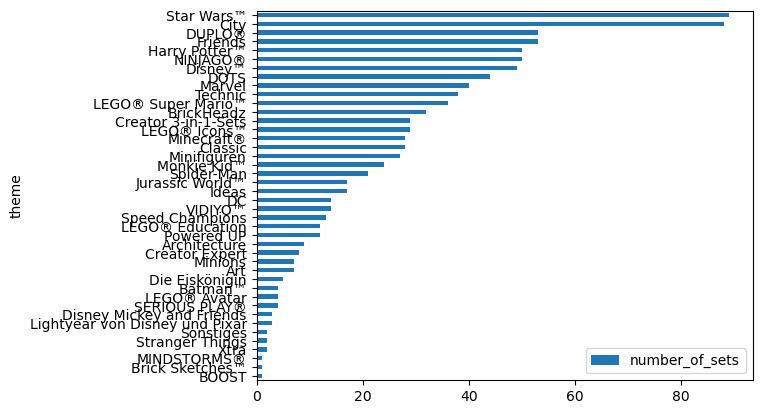

In [8]:
df_sorted.plot.barh(x = "theme", y = "number_of_sets")

### Weiter als Series

Arbeitet man direkt mit der *Series* so kann man auch hier `sort_values` aufrufen.
Für den resultierenden Vektor stehen auch plot-Methden zur Verfügung.

<AxesSubplot:ylabel='theme'>

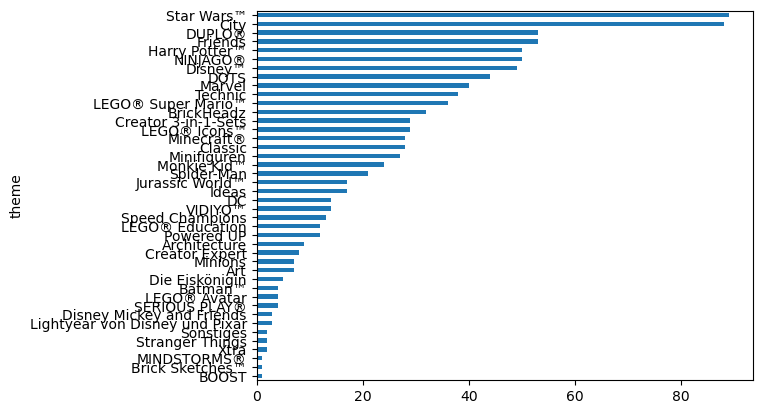

In [9]:
theme_sizes.sort_values().plot.barh()

## Frage 2: In welchen Themen ist der Preis pro Einzelbauteil besonders hoch?

In [10]:
LEGO_current["price_per_piece"] = LEGO_current["price"] / LEGO_current["piece_count"]
LEGO_current.head()

,name,theme,product_code,ages,piece_count,vip_points,price,dimension_1,dimension_2,dimension_3,url,date,price_per_piece
0,Cheops-Pyramide,Architecture,21058,18+,1476.0,1050.0,139.99,NaN,NaN,NaN,/de-de/product/great-pyramid-of-giza-21058,2022-09-19,0.094844
1,Taj Mahal,Architecture,21056,18+,2022.0,900.0,119.99,"H: 8"" (20cm)","B: 10"" (23cm)","T: 10"" (23cm)",/de-de/product/taj-mahal-21056,2022-09-19,0.059342
2,Das Weiße Haus,Architecture,21054,18+,1483.0,750.0,99.99,NaN,NaN,NaN,/de-de/product/the-white-house-21054,2022-09-19,0.067424
3,Freiheitsstatue,Architecture,21042,16+,1685.0,750.0,99.99,NaN,NaN,NaN,/de-de/product/statue-of-liberty-21042,2022-09-19,0.059341
4,Singapur,Architecture,21057,18+,827.0,450.0,59.99,NaN,NaN,NaN,/de-de/product/singapore-21057,2022-09-19,0.072539


Nun gruppieren wir nach *theme*, betrachten nur noch die Spalte *price_per_piece* und mitteln diesen.

In [11]:
avg_price_per_piece = LEGO_current.groupby("theme")["price_per_piece"].mean()
avg_price_per_piece.head()

theme
Architecture       0.078804
Art                0.036932
BOOST              0.200697
Batman™            0.192850
Brick Sketches™    0.084950
Name: price_per_piece, dtype: float64

<AxesSubplot:title={'center':'Mittlerer Preis pro Einzelbauteil'}, ylabel='theme'>

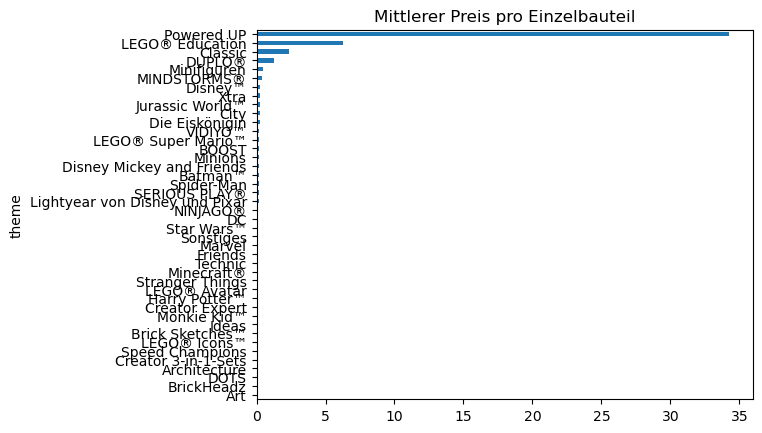

In [12]:
avg_price_per_piece.sort_values().plot.barh(title = "Mittlerer Preis pro Einzelbauteil")

Um etwas in die Graphik zu zoomen, beschränken wir den Vektor auf diejenigen Themen, welche einen durchschnittlichen Einzelteilpreis von weniger als 5 Euro haben.

<AxesSubplot:title={'center':'Mittlerer Preis pro Einzelbauteil'}, ylabel='theme'>

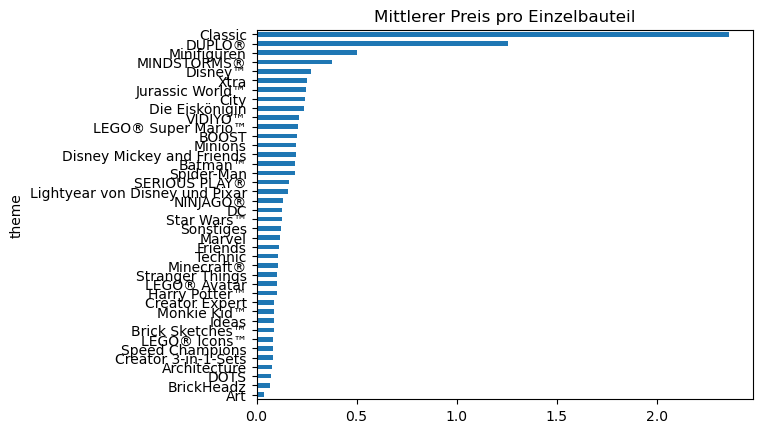

In [13]:
avg_price_per_piece[avg_price_per_piece < 5].sort_values().plot.barh(title = "Mittlerer Preis pro Einzelbauteil")